**KHAI BÁO THƯ VIỆN**

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.optimizers import SGD, RMSprop
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils, to_categorical, load_img, img_to_array
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, LeakyReLU

from sklearn import preprocessing
from sklearn.utils import validation
from sklearn.model_selection import train_test_split

**GỌI THƯ MỤC CHỨA ẢNH**

In [2]:
%cd '/content/drive/MyDrive/FaceIMG_Class'

/content/drive/MyDrive/FaceIMG_Class


**ImageDataGenerator : Giúp tải và gắn nhãn các tập dữ liệu hình ảnh. Tạo hai đối tượng cho ImageDataGenerator và cũng thay đổi tỷ lệ hình ảnh sao cho giá trị pixel của chúng được chuẩn hóa từ 0 đến 1 (bằng cách chia cho 255). RGB có 8 bit cho mỗi kênh màu. Phạm vi cho mỗi màu riêng lẻ là 0–255 (như 2⁸ = 256 khả năng). Vì vậy, bằng cách chia cho 255, phạm vi 0–255 có thể được mô tả với phạm vi 0,0–1,0 trong đó 0,0 có nghĩa là 0 (0x00) và 1,0 có nghĩa là 255 (0xFF)**

**flow_from_directory : chỉ định đường dẫn đến các thư mục huấn luyện và kiểm tra**

In [3]:
Data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
Train = Data.flow_from_directory('/content/drive/MyDrive/FaceIMG_Class', target_size=(25,30),batch_size=32, class_mode='categorical')
Train.class_indices

Found 250 images belonging to 5 classes.


{'BaoThai': 0, 'HoangThanh': 1, 'NhutSang': 2, 'TanDat': 3, 'TuanKiet': 4}

In [4]:
#Tạo mô hình Sequential
model=Sequential()

# Tạo lớp Convolution với bộ lọc 3x3, activation là hàm phi tuyến
'''Conv2D (): 
- Mạng nơ-ron áp dụng bộ lọc cho hình ảnh đầu vào để tạo bản đồ đặc trưng tóm tắt sự hiện diện 
của các tính năng hoặc mẫu được phát hiện trong đầu vào. Trong trường hợp của chúng ta, có 32, 64, 128 và 128 bộ lọc
- Tăng số lượng bộ lọc trên mỗi lớp vì khi di chuyển về phía trước trong các lớp, các mẫu trở nên phức tạp hơn; 
do đó có nhiều sự kết hợp của các mẫu để chụp. Vì vậy, tăng kích thước bộ lọc trong các lớp tiếp theo để thu được nhiều kết hợp nhất có thể'''

'''MaxPool2D (): 
- Tổng hợp tối đa là thao tác gộp chọn phần tử lớn nhất từ ​​vùng của bản đồ đối tượng được bộ lọc bao phủ
- Nói một cách đơn giản trong Max pooling, chọn giá trị lớn nhất trong ma trận để giảm kích thước hình ảnh 
mà không làm mất thông tin hình ảnh'''

'''Flatten (): Chuyển đổi mảng dữ liệu hình ảnh đa chiều thành mảng một chiều'''

'''Dense (): Lớp mạng nơ-ron được kết nối đầy đủ trong đó mỗi nút đầu vào được kết nối với mỗi nút đầu ra'''

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(25,30,3))) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(5,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 15, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

**BIÊN DỊCH**

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train=model.fit(Train, epochs=50, batch_size=256, verbose=1)

Epoch 1/50
8/8 [==============================] - 3s 195ms/step - loss: 0.1745 - accuracy: 0.9360
Epoch 2/50
8/8 [==============================] - 1s 130ms/step - loss: 0.0400 - accuracy: 0.9880
Epoch 3/50
8/8 [==============================] - 1s 121ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 4/50
8/8 [==============================] - 1s 121ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 5/50
8/8 [==============================] - 1s 122ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 6/50
8/8 [==============================] - 1s 122ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 7/50
8/8 [==============================] - 1s 131ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 8/50
8/8 [==============================] - 1s 175ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 9/50
8/8 [==============================] - 2s 261ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 10/50
8/8 [==============================] - 3s 354ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 11/50
8/8 [==

**ĐÁNH GIÁ ĐỘ CHÍNH XÁC VÀ ĐỘ MẤT MÁT**

In [7]:
Score=model.evaluate(Train,verbose=0)
print('Hàm Mất Mát Trên Tập Kiểm Tra : ', Score[0])
print('Độ Chính Xác Trên Tập Kiểm Tra : ', Score[1])

Hàm Mất Mát Trên Tập Kiểm Tra :  2.7848560421261936e-05
Độ Chính Xác Trên Tập Kiểm Tra :  1.0


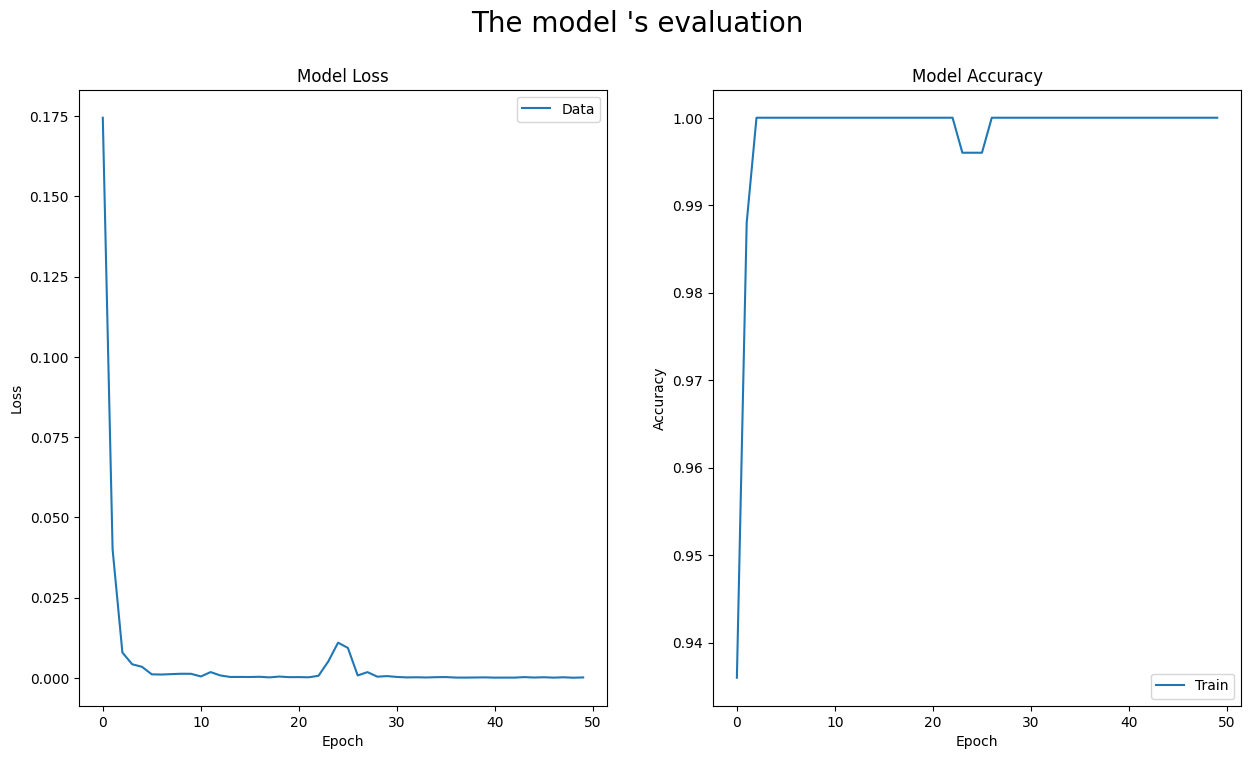

In [11]:
fig,axes = plt.subplots(1,2, figsize=(15,8))
fig.suptitle("The model 's evaluation ",fontsize=20)

axes[0].plot(train.history['loss'])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Data'])

axes[1].plot(train.history['accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train'])
plt.show()

**LƯU DỮ LIỆU VỪA TRAIN**

In [12]:
model.save('/content/drive/MyDrive/Saved_Train/20146132_Face_Class.h5')

**LẤY DỮ LIỆU VỪA TRAIN ĐỂ BẮT ĐẦU NHẬN DIỆN**

In [13]:
model_1 = load_model('/content/drive/MyDrive/Saved_Train/20146132_Face_Class.h5')

**NHẬN DIỆN**

1/1 [==============================] - 0s 140ms/step
Đây là : HoangThanh


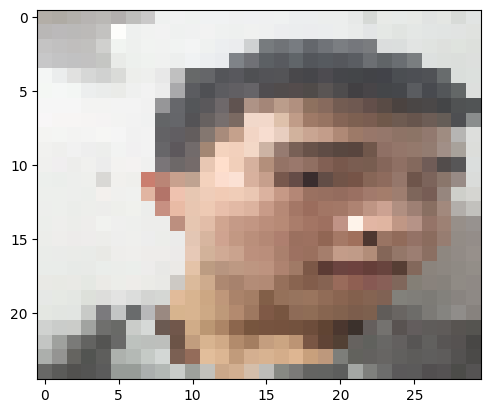

1/1 [==============================] - 0s 27ms/step
Đây là : BaoThai


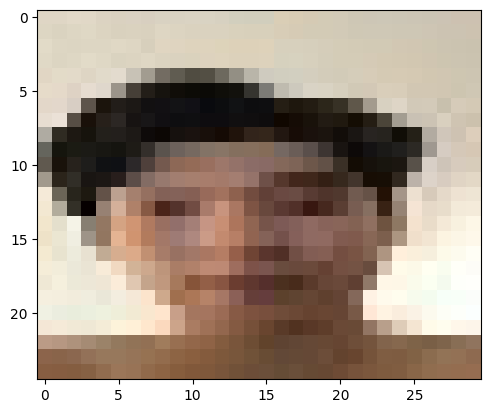

1/1 [==============================] - 0s 24ms/step
Đây là : TanDat


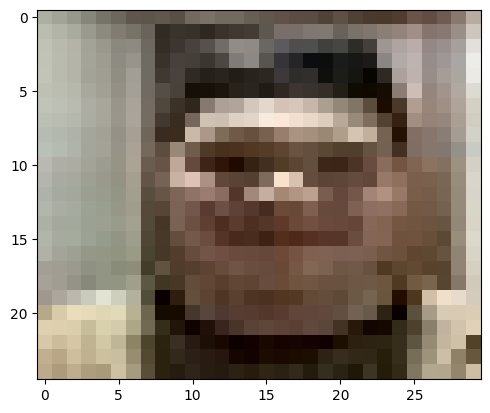

1/1 [==============================] - 0s 29ms/step
Đây là : NhutSang


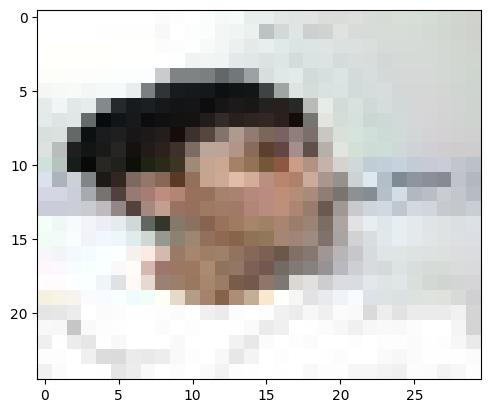

1/1 [==============================] - 0s 27ms/step
Đây là : TuanKiet


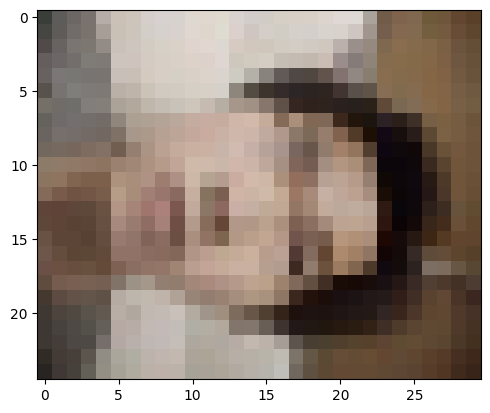

In [14]:
folder='/content/drive/MyDrive/Test/20146132_Face_Class/'
for i in os.listdir(folder):
  img=load_img(folder+i, target_size=(25,30))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['BaoThai', 'HoangThanh', 'NhutSang', 'TanDat', 'TuanKiet']
  print('Đây là : {}'.format(class_name[result]))
  plt.show()